# Teeth Classification using Transfer Learning (MobileNetV2)

## 1. Import All Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


## 2. Load Data


In [4]:
train_dir = '../data/Teeth_Dataset/Training'
val_dir = '../data/Teeth_Dataset/Validation'

train_datagen =ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
  )

val_datagen = ImageDataGenerator(rescale=1./255)

### Create Data Generators



In [5]:
train_ds = train_datagen.flow_from_directory(train_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')


Found 3087 images belonging to 7 classes.


In [6]:
val_ds = val_datagen.flow_from_directory(val_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')


Found 1028 images belonging to 7 classes.


## 4. Build the Transfer Learning Model

In [7]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [8]:
base_model.trainable = False #Freeze the pretrained layers

In [9]:
from tensorflow.keras import layers ,models
from keras.layers import Dropout,GlobalAveragePooling2D


In [10]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(7,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    filepath='../saved_models/best_teeth_model_try2.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


## 5. Compile the Model

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## 6. Train the Model

In [14]:
history= model.fit(train_ds, validation_data=val_ds, epochs=20,batch_size=128,callbacks=[checkpoint])

c:\Users\digital\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3981 - loss: 1.6307
Epoch 1: val_accuracy improved from -inf to 0.70817, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.3991 - loss: 1.6278 - val_accuracy: 0.7082 - val_loss: 0.8625
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6509 - loss: 0.9110
Epoch 2: val_accuracy improved from 0.70817 to 0.79377, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.6512 - loss: 0.9105 - val_accuracy: 0.7938 - val_loss: 0.6212
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7429 - loss: 0.7268
Epoch 3: val_accuracy improved from 0.79377 to 0.83755, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.7430 - loss: 0.7264 - val_accuracy: 0.8375 - val_loss: 0.4989
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8046 - loss: 0.5653
Epoch 4: val_accuracy improved from 0.83755 to 0.85992, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.8045 - loss: 0.5653 - val_accuracy: 0.8599 - val_loss: 0.4314
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8279 - loss: 0.4885
Epoch 5: val_accuracy improved from 0.85992 to 0.87646, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.8280 - loss: 0.4884 - val_accuracy: 0.8765 - val_loss: 0.3543
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8647 - loss: 0.4128
Epoch 6: val_accuracy improved from 0.87646 to 0.89689, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8647 - loss: 0.4128 - val_accuracy: 0.8969 - val_loss: 0.3272
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8732 - loss: 0.3722
Epoch 7: val_accuracy improved from 0.89689 to 0.92315, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.8732 - loss: 0.3722 - val_accuracy: 0.9232 - val_loss: 0.2559
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8811 - loss: 0.3415
Epoch 8: val_accuracy did not improve from 0.92315
97/97 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.8811 - loss: 0.3415 - val_accuracy: 0.8794 - val_loss: 0.3263
Epoch 9/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8897 - loss: 0.3168
Epoch 9: val_accuracy improved from 0.92315 to 0.92996, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.8897 - loss: 0.3168 - val_accuracy: 0.9300 - val_loss: 0.2222
Epoch 10/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9215 - loss: 0.2537
Epoch 10: val_accuracy improved from 0.92996 to 0.93385, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9214 - loss: 0.2538 - val_accuracy: 0.9339 - val_loss: 0.1873
Epoch 11/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9074 - loss: 0.2819
Epoch 11: val_accuracy improved from 0.93385 to 0.95428, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9074 - loss: 0.2819 - val_accuracy: 0.9543 - val_loss: 0.1595
Epoch 12/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9113 - loss: 0.2413
Epoch 12: val_accuracy did not improve from 0.95428
97/97 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9114 - loss: 0.2412 - val_accuracy: 0.9504 - val_loss: 0.1642
Epoch 13/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9195 - loss: 0.2362
Epoch 13: val_accuracy improved from 0.95428 to 0.96498, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.9194 - loss: 0.2362 - val_accuracy: 0.9650 - val_loss: 0.1234
Epoch 14/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9276 - loss: 0.2022
Epoch 14: val_accuracy did not improve from 0.96498
97/97 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9277 - loss: 0.2020 - val_accuracy: 0.9543 - val_loss: 0.1341
Epoch 15/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9336 - loss: 0.1907
Epoch 15: val_accuracy improved from 0.96498 to 0.96693, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.9336 - loss: 0.1906 - val_accuracy: 0.9669 - val_loss: 0.1152
Epoch 16/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9394 - loss: 0.1816
Epoch 16: val_accuracy improved from 0.96693 to 0.97179, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9394 - loss: 0.1815 - val_accuracy: 0.9718 - val_loss: 0.1061
Epoch 17/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9441 - loss: 0.1805
Epoch 17: val_accuracy improved from 0.97179 to 0.97276, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.9442 - loss: 0.1804 - val_accuracy: 0.9728 - val_loss: 0.1074
Epoch 18/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9468 - loss: 0.1671
Epoch 18: val_accuracy did not improve from 0.97276
97/97 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9468 - loss: 0.1670 - val_accuracy: 0.9718 - val_loss: 0.0909
Epoch 19/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9579 - loss: 0.1407
Epoch 19: val_accuracy improved from 0.97276 to 0.97665, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.9579 - loss: 0.1407 - val_accuracy: 0.9767 - val_loss: 0.0900
Epoch 20/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9498 - loss: 0.1451
Epoch 20: val_accuracy improved from 0.97665 to 0.97957, saving model to ../saved_models/best_teeth_model_try2.h5


97/97 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9498 - loss: 0.1452 - val_accuracy: 0.9796 - val_loss: 0.0817


 ## 7. Visualize Model Accuracy

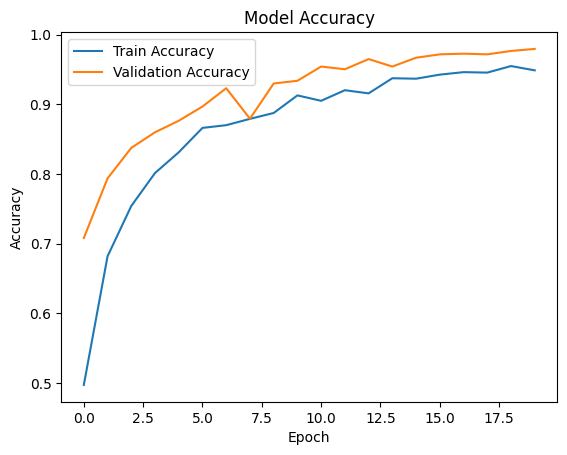

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


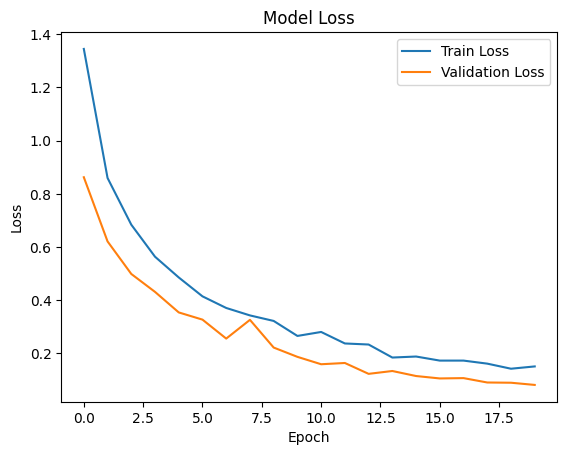

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

## 8.Evaluate the model

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_ds = test_datagen.flow_from_directory(
    '../data/Teeth_Dataset/Testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1028 images belonging to 7 classes.


In [18]:
loss, acc = model.evaluate(test_ds)
print(f"Validation Accuracy: {acc:.2f}")
print(f"Validation Loss: {loss:.4f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9912 - loss: 0.0486
Validation Accuracy: 0.98
Validation Loss: 0.0735


33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 852ms/step


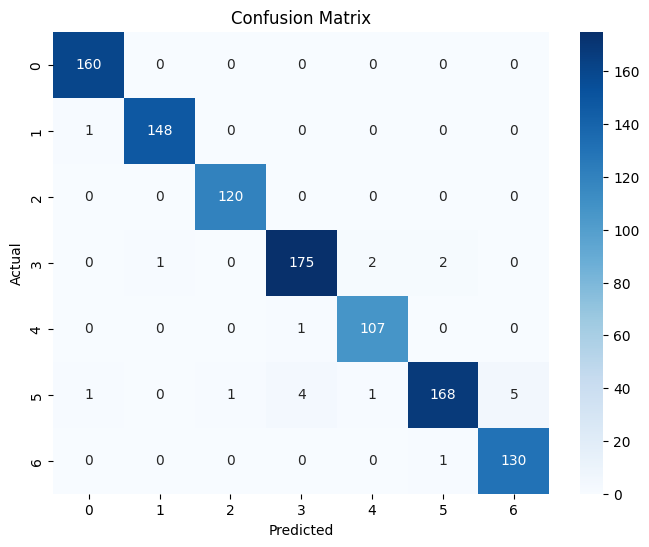

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns


y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = test_ds.classes


cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [20]:
class_names = list(test_ds.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

         CaS       0.99      1.00      0.99       160
         CoS       0.99      0.99      0.99       149
         Gum       0.99      1.00      1.00       120
          MC       0.97      0.97      0.97       180
          OC       0.97      0.99      0.98       108
         OLP       0.98      0.93      0.96       180
          OT       0.96      0.99      0.98       131

    accuracy                           0.98      1028
   macro avg       0.98      0.98      0.98      1028
weighted avg       0.98      0.98      0.98      1028



# Save the model

In [21]:
#model.save("../saved_models/best_teeth_model.h5")